<a href="https://colab.research.google.com/github/Steve-YJ/Explore-Kaggle/blob/master/01_Classification_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# 'cs231n' folder containing the '.py', 'classifiers' and 'datasets'
# folders.
# e.g. 'cs231n/assignments/assignment1/cs231n/'
FOLDERNAME = 'kaggle-DataScience'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
# %cp -r $FOLDERNAME ../../
# %cd ../../
# %cd /Malimg_Exp_200611/
# !bash get_datasets.sh
# %cd ../../

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive


In [0]:
with open('/content/drive/My Drive/Malimg_Exp_200611/malimg_data2.pkl', 'rb') as f:
    data = pickle.load(f)

In [0]:
import 

## EDA To Prediction(feat. Die Tanic)

* Reference Kaggle Notebook
    * https://www.kaggle.com/ash316/eda-to-prediction-dietanic
* Data Discription
    * https://www.kaggle.com/c/titanic/data


"Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible." - Lisa Kleypas -

## Introduction

The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate comtetitions in kaggle.

<code>The Objective of this notebook</code> is to give an idea how is the workflow in any predictive modeling problem.
* Objective
    * How do we check features
    * How do we add new features and some Machine Learning Concept

* Addition
    * He also try to keep the notebook as basic as possible so that even newbies can understand every phase of it.


### Contents of the Notebook
* Part1: EDA(Exploratory Data Analysis)
    * Analysis of the Features
    * Finding any relations or trends considering multiple features
* Part2: Feature Engineering and Data Cleaning
    * Add any few features
    * Removing redundant features
    * Converting features into suitable form for modeling

# Part1: EDA(Exploratory Data Analysis)
* Analysis of the Features
* Finding any relations or trends considering multiple features

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')  # 경고 메세지 숨기기
%matplotlib inline

## #1. Load data

<code>pandas.read_csv</code>: Read a comma-separated values(csv) file into DataFrame. also supports optionally iterating or breaking of the file into chunks.

In [9]:
data = pd.read_csv('/content/drive/My Drive/Kaggle-DataScience/Dataset/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.shape

(891, 12)

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# checking for total null values

data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data.isnull().sum().sum()

866

How many Survived?

In [17]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
data.Pclass.value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

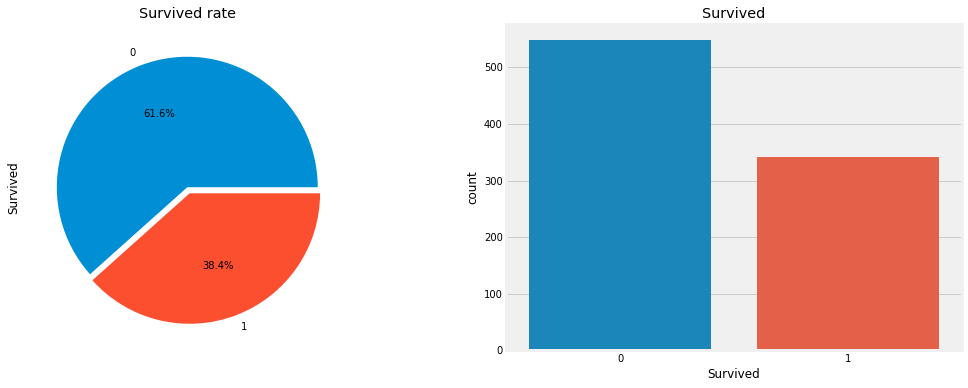

In [23]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
data.Survived.value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Survived rate')
sns.countplot(data.Survived, data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Analyzing the Features
* Feature Analysis
    * Categorical Feature
    * Ordinal Feature
    * Continuous Feature